In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
data = pd.read_csv("Indian automoble buying behavour study 1.0.csv")

In [72]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [73]:
data.shape

(99, 13)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [75]:
data['Make'].value_counts()

SUV        19
Baleno     19
Creata     14
i20        12
Ciaz       12
City       10
Duster      7
Verna       4
Luxuray     2
Name: Make, dtype: int64

Text(0.5, 1.0, 'Purchase Frequency Comparison')

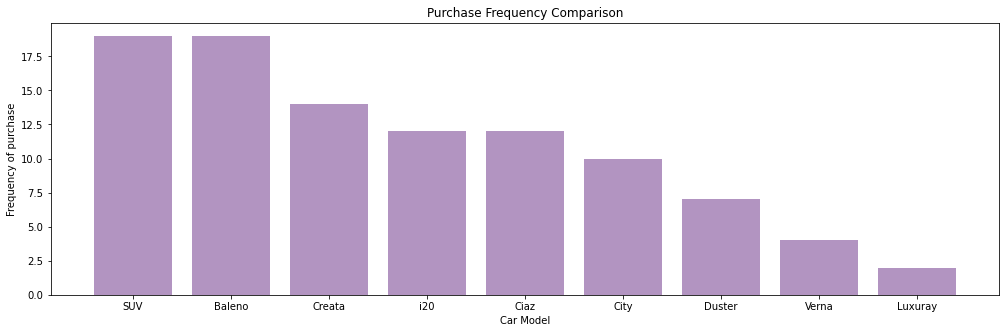

In [76]:
# Type of cars in highest demand
plt.figure(figsize=(17, 5))
plt.bar( list(data['Make'].value_counts().index) , list(data['Make'].value_counts()), color = (0.5, 0.3, 0.6, 0.6))
plt.xlabel("Car Model")
plt.ylabel("Frequency of purchase")
plt.title("Purchase Frequency Comparison")

In [77]:
print(data['Age'].min(), data['Age'].max())

26 51


In [78]:
age_make = pd.DataFrame(list(data['Make'].unique()), columns = ['Car Make'])

In [79]:
ages = []

for car_s in age_make['Car Make']:
    ages.append(data[ data['Make'] == car_s ]['Age'].mean())

In [80]:
age_make['Price(L)'] = pd.Series(ages)

In [81]:
age_make

,Car Make,Price(L)
0,i20,33.500000
1,Ciaz,37.916667
2,Duster,40.571429
3,City,34.000000
4,SUV,37.421053
5,Baleno,33.421053
6,Verna,34.000000
7,Luxuray,45.000000
8,Creata,38.714286


In [82]:
## The average age values are more or less the same. Therefore mean ages doesn't seem the right way to map 
## the age groups to the car make models

In [83]:
min_age = data['Age'].min()
max_age = data['Age'].max()
car_freq = []
age_groups = []

while min_age < max_age:
    d = {}
    m = min_age + 10
    if m > max_age:
        m = max_age
    age_groups.append(str(min_age) + " - " + str(m))
    temp = data[ (data['Age'] >= min_age) & (data['Age'] < m) ]['Make'].value_counts()
    for i in range(len(temp)):
        d[list(temp.index)[i]] = temp[i]
    car_freq.append(d)
    min_age += 10


In [84]:
ag_df = pd.DataFrame(age_groups, columns = ['Age Groups'])

In [85]:
ag_df

,Age Groups
0,26 - 36
1,36 - 46
2,46 - 51


In [86]:
for car in data['Make'].unique():
    ag_df[car] = 0

In [87]:
ag_df

,Age Groups,i20,Ciaz,Duster,City,SUV,Baleno,Verna,Luxuray,Creata
0,26 - 36,0,0,0,0,0,0,0,0,0
1,36 - 46,0,0,0,0,0,0,0,0,0
2,46 - 51,0,0,0,0,0,0,0,0,0


In [88]:
for i in range(ag_df.shape[0]):
    for col in ag_df.columns[1:]:
        if col in car_freq[i].keys():
            ag_df.loc[i, col] = car_freq[i][col]

In [89]:
ag_df

,Age Groups,i20,Ciaz,Duster,City,SUV,Baleno,Verna,Luxuray,Creata
0,26 - 36,8,6,1,5,8,14,2,0,4
1,36 - 46,4,4,5,5,9,4,2,1,9
2,46 - 51,0,0,1,0,2,1,0,1,0


In [90]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


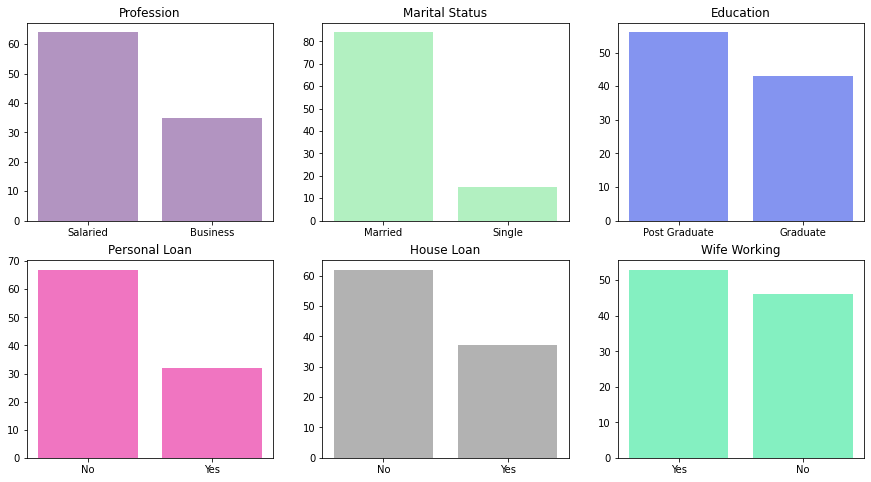

In [91]:
figure, axes = plt.subplots(2, 3, figsize = (15, 8)) 

axes[0][0].bar(data['Profession'].value_counts().index, data['Profession'].value_counts(), color = (0.5, 0.3, 0.6, 0.6))
axes[0][0].title.set_text('Profession')
axes[0][1].bar(data['Marrital Status'].value_counts().index, data['Marrital Status'].value_counts(), color = (0.5, 0.9, 0.6, 0.6))
axes[0][1].title.set_text('Marital Status')
axes[0][2].bar(data['Education'].value_counts().index, data['Education'].value_counts(), color = (0.2, 0.3, 0.9, 0.6))
axes[0][2].title.set_text('Education')

axes[1][0].bar(data['Personal loan'].value_counts().index, data['Personal loan'].value_counts(), color = (0.9, 0.1, 0.6, 0.6))
axes[1][0].title.set_text('Personal Loan')
axes[1][1].bar(data['House Loan'].value_counts().index, data['House Loan'].value_counts(), color = (0.5, 0.5, 0.5, 0.6))
axes[1][1].title.set_text('House Loan')
axes[1][2].bar(data['Wife Working'].value_counts().index, data['Wife Working'].value_counts(), color = (0.2, 0.9, 0.6, 0.6))
axes[1][2].title.set_text('Wife Working')

In [92]:
price_sal = data[[ 'Total Salary', 'Price' ]]

In [93]:
price_sal.head()

,Total Salary,Price
0,800000,800000
1,2000000,1000000
2,1800000,1200000
3,2200000,1200000
4,2600000,1600000


<AxesSubplot:>

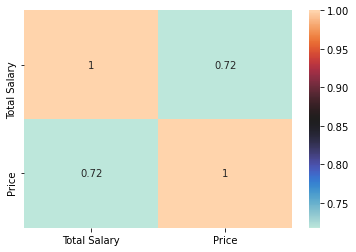

In [94]:
corr = price_sal.corr()
plt.figure(figsize = (6, 4))
sns.heatmap(corr, annot = True, cmap = "icefire")

In [95]:
data['Profession'] = data['Profession'].replace({'Business': 0, 'Salaried': 1})
data['Marrital Status'] = data['Marrital Status'].replace({'Married': 0, 'Single': 1})
data['Education'] = data['Education'].replace({'Graduate': 0, 'Post Graduate': 1})
data['Personal loan'] = data['Personal loan'].replace({'No': 0, 'Yes': 1})
data['House Loan'] = data['House Loan'].replace({'No': 0, 'Yes': 1})
data['Wife Working'] = data['Wife Working'].replace({'No': 0, 'Yes': 1})

In [96]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,i20,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,Ciaz,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,Duster,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,City,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,SUV,1600000


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     int64 
 2   Marrital Status   99 non-null     int64 
 3   Education         99 non-null     int64 
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     int64 
 6   House Loan        99 non-null     int64 
 7   Wife Working      99 non-null     int64 
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 10.2+ KB


<AxesSubplot:>

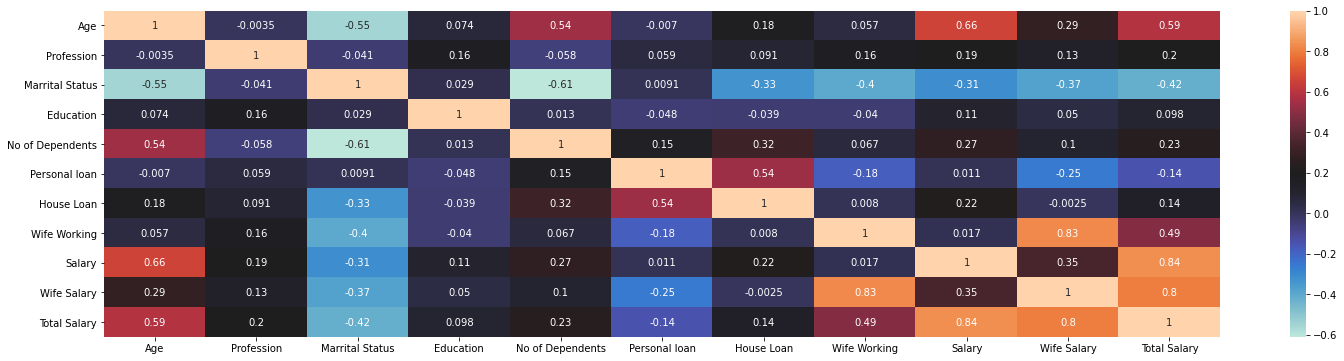

In [98]:
corr = data.iloc[:, :-2].corr()
plt.figure(figsize = (25, 6))
sns.heatmap(corr, annot = True, cmap = "icefire")

In [99]:
data1 = data.drop(['Salary', 'Wife Salary'], axis = 1)

In [100]:
data1.head(3)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Total Salary,Make,Price
0,27,1,1,1,0,1,0,0,800000,i20,800000
1,35,1,0,1,2,1,1,1,2000000,Ciaz,1000000
2,45,0,0,0,4,1,1,0,1800000,Duster,1200000


In [101]:
x = data1.iloc[:, :-2].values

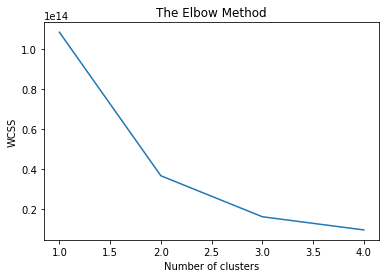

In [102]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [103]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(x)

KMeans(n_clusters=2, random_state=42)

In [104]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 75, 1: 24})

In [105]:
data['Cluster'] = kmeans.labels_

In [106]:
data.tail()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Cluster
94,27,0,1,0,0,0,0,0,2400000,0,2400000,SUV,1600000,0
95,50,1,0,1,3,0,0,1,3800000,1300000,5100000,SUV,1600000,1
96,51,0,0,0,2,1,1,0,2200000,0,2200000,Ciaz,1100000,0
97,51,1,0,1,2,0,0,1,2700000,1300000,4000000,Creata,1500000,1
98,51,1,0,1,2,1,1,0,2200000,0,2200000,Ciaz,1100000,0


In [107]:
data[ data['Cluster'] == 0 ]['Make'].unique()

array(['i20', 'Ciaz', 'Duster', 'City', 'SUV', 'Baleno', 'Verna',
       'Creata'], dtype=object)

In [108]:
data[ data['Cluster'] == 1 ]['Make'].unique()

array(['Luxuray', 'SUV', 'Creata', 'Duster', 'City'], dtype=object)

In [109]:
data[ data['Cluster'] == 0 ]['Price'].mean()

1050800.0

In [110]:
data[ data['Cluster'] == 1 ]['Price'].mean()

1641666.6666666667

In [111]:
data[ data['Cluster'] == 0 ]['Salary'].mean()

1474666.6666666667

In [112]:
data[ data['Cluster'] == 1 ]['Salary'].mean()

2554166.6666666665

In [113]:
print(data[ data['Cluster'] == 0 ]['Age'].mean(), data[ data['Cluster'] == 1 ]['Age'].mean())

34.84 40.916666666666664


In [114]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [115]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [116]:
pca = PCA()
pca.fit(x)

PCA()

Text(0, 0.5, 'Cumulative Explained Variance')

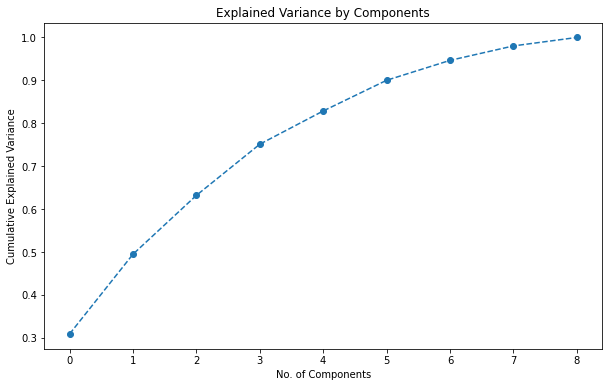

In [117]:
plt.figure(figsize = (10, 6))
plt.plot(range(data1.shape[1] - 2), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('No. of Components')
plt.ylabel('Cumulative Explained Variance')

In [118]:
pca = PCA(n_components = 4)
pca.fit(x)

PCA(n_components=4)

In [119]:
pca_scores = pca.transform(x)

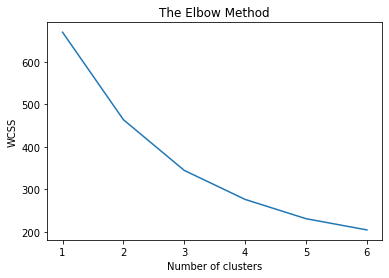

In [120]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_scores)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [121]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=42)

In [122]:
Counter(kmeans.labels_)


Counter({2: 16, 0: 26, 1: 57})

In [123]:
data['Cluster1'] = kmeans.labels_

In [124]:
print(data[ data['Cluster1'] == 0 ]['Age'].mean(), data[ data['Cluster1'] == 1 ]['Age'].mean(), 
      data[ data['Cluster1'] == 2 ]['Age'].mean())

38.30769230769231 37.6140350877193 28.4375


In [125]:
print(data[ data['Cluster1'] == 0 ]['Make'].unique(), data[ data['Cluster1'] == 1 ]['Make'].unique(),
      data[ data['Cluster1'] == 2 ]['Make'].unique())


['Ciaz' 'Duster' 'Baleno' 'i20' 'Verna' 'Creata' 'SUV' 'City'] ['City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'i20' 'Ciaz' 'Duster' 'Creata'] ['i20' 'Baleno' 'City' 'SUV' 'Ciaz' 'Creata']


In [126]:
print(data[ data['Cluster1'] == 0 ]['Total Salary'].mean(), data[ data['Cluster1'] == 1 ]['Total Salary'].mean(), 
      data[ data['Cluster1'] == 2 ]['Total Salary'].mean())

2265384.6153846155 2559649.1228070175 1250000.0


In [127]:
print(data[ data['Cluster1'] == 0 ]['Price'].mean(), data[ data['Cluster1'] == 1 ]['Price'].mean(), 
      data[ data['Cluster1'] == 2 ]['Price'].mean())

1003846.1538461539 1322982.4561403508 1043750.0
